<a href="https://colab.research.google.com/github/OlyaMizonova/training-with-ml/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузить в датафрейм+
2. Построить пару графиков - зависимостей признаков друг от друга (можно поменять цвета, шрифты и все такое)

(в этих данных такого нет :[ ) 3. Поискать пропущенные значения и поработать с ними (удалить/заменить)
4. Бонус - поискать выбросы с помощью квантилей и попутно разобраться, что же это такое +
5. Закодировать категориальные переменные, если они есть+
7. Разделить на тренировочную и тестовую выборки+
8. Попробовать следующие модели:

 Регрессия:
 $$
 8.1 KNN+\\
 8.2 Linear Regression+\\
 8.3 SVR+\\
 8.4 Decision Tree+\\
 8.5 Random Forest+\\
 8.6 Gradient Boosting (библиотека CatBoost или xgboost)\\
 $$

9. Для каждой модели попробовать перебрать её гиперпараметры (их можно найти в документации). Перебора из 3 значений хватит, но вас никто не ограничивает в поиске лучшей модели
10. Для задачи регрессии использовать  - MSE и MAE

In [454]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps

In [529]:
dataset = pd.read_csv('data.csv', encoding='latin-1')

In [530]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [531]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [532]:
len(dataset['country'].unique())#можно убрать

1

In [533]:
dataset=dataset.drop(['country'], axis=1) #непонятно вообще можно ли как то посчитать корреляцию между не числовыми признаками...
dataset=dataset.drop(['statezip'], axis=1)
dataset=dataset.drop(['date'], axis=1)
dataset=dataset.drop(['street'], axis=1)
dataset=dataset.drop(['city'], axis=1)

попробуем закодировать города, штаты, дату и улицы уберем(это не привело ни к чему хорошему, поэтому я убрала)

In [534]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


пропробуем LinearRegression

In [535]:
Y = dataset['price']
X = dataset.drop(['price'], axis=1)

In [536]:
from sklearn.model_selection import train_test_split

In [537]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [538]:
from sklearn.linear_model import LinearRegression

In [539]:
model = LinearRegression()

In [540]:
model.fit(X_train, Y_train)

LinearRegression()

In [541]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [542]:
mean_absolute_error(Y_test,model.predict(X_test))

188183.32880940897

In [543]:
mean_squared_error(Y_test,model.predict(X_test))

819521584962.2981

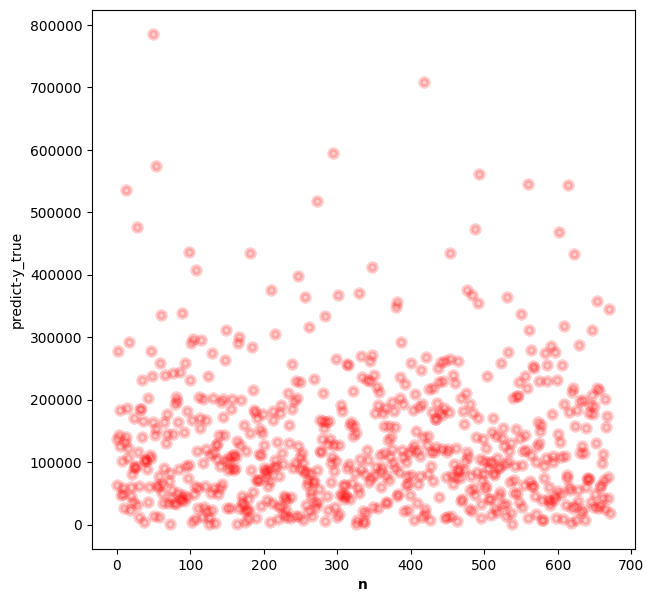

In [607]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

почистим цену от выбросов

In [545]:
price_0_95_quant = np.quantile(dataset['price'], .95)
price_0_05_quant = np.quantile(dataset['price'], .05)
print(price_0_95_quant, price_0_05_quant)

1184050.0000000002 200000.0


In [546]:
indToDrop=[]
for i in range (len(dataset['price'])):
  if(dataset['price'][i] > price_0_95_quant or dataset['price'][i]<price_0_05_quant):
    indToDrop.append(i)

In [547]:
dataset=dataset.drop(indToDrop, axis=0)

In [548]:
dataset = dataset.reset_index()

почистим теперь жилую площадь от выбросов

In [549]:
stliv_0_95_quant = np.quantile(dataset['sqft_living'], .95)
stliv_0_05_quant = np.quantile(dataset['sqft_living'], .05)
print(stliv_0_95_quant, stliv_0_05_quant)

3550.0 971.0000000000002


In [550]:
indToDrop=[]
for i in range (len(dataset['sqft_living'])):
  if(dataset['sqft_living'][i] > stliv_0_95_quant or dataset['sqft_living'][i]<stliv_0_05_quant):
    indToDrop.append(i)

In [551]:
dataset=dataset.drop(indToDrop, axis=0)
dataset = dataset.reset_index()

In [552]:
dataset=dataset.drop(['level_0'],axis=1)
dataset=dataset.drop(['index'],axis=1)

снова попробуем LinearRegression

In [553]:
Y = dataset['price']
X = dataset.drop(['price'], axis=1)

In [554]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [555]:
model = LinearRegression()

In [556]:
model.fit(X_train, Y_train)

LinearRegression()

In [557]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions),dtype=np.float64)

In [558]:
mae(Y_test,model.predict(X_test))

125213.94276656114

In [559]:
root_mean_squared_error(Y_test,model.predict(X_test))

159829.22349728155

In [560]:
mean_absolute_error(Y_test,model.predict(X_test))

125213.94276656114

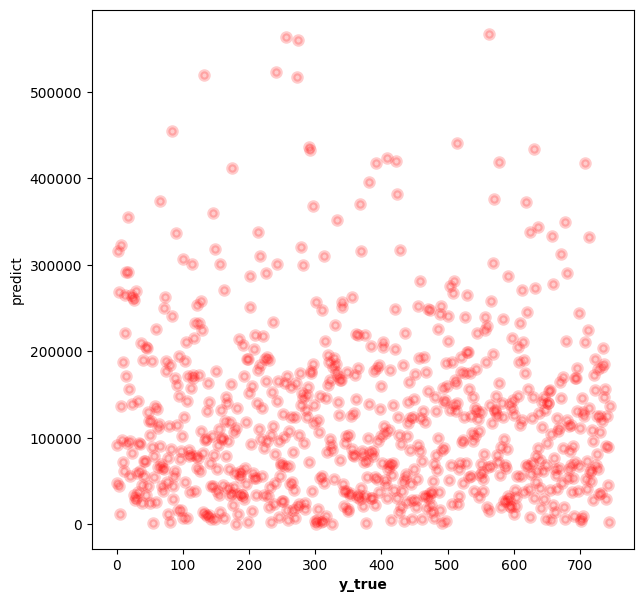

In [561]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

стало чуть лучше

In [562]:
stlot_0_95_quant = np.quantile(dataset['sqft_lot'], .95)
stlot_0_05_quant = np.quantile(dataset['sqft_lot'], .05)
print(stlot_0_95_quant, stlot_0_05_quant)

39639.0 1570.8


In [486]:
#почистим еще площади участков

In [563]:
indToDrop=[]
for i in range (len(dataset['sqft_lot'])):
  if(dataset['sqft_lot'][i] > stlot_0_95_quant or dataset['sqft_lot'][i]<stlot_0_05_quant):
    indToDrop.append(i)

In [564]:
dataset=dataset.drop(indToDrop, axis=0)
dataset = dataset.reset_index()

In [493]:
dataset=dataset.drop(['index'],axis=1)

In [565]:
dataset['waterfront'].unique()

array([0, 1])

In [566]:
dataset=dataset.drop(['waterfront'],axis=1)

наверное заменю площади подвала и чердака просто фактом их наличия

In [567]:
for i in range (len(dataset['sqft_above'])):
  if(dataset['sqft_above'][i]!=0):
    dataset['sqft_above'][i]=1
  if(dataset['sqft_basement'][i]!=0):
    dataset['sqft_basement'][i]=1

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-567-6597c41d110e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sqft_above'][i]=1
<ipython-input-567-6597c41d110e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sqft_basement'][i]=1
<ipython-input-567-6597c41d110e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sqft_above'][i]=1
<ipython-input-567-6597c41d110e>:3: Setti

годы постройки и реконструкции заменю на "возраст"

In [568]:
ageBuilding=[]
for i in range (len(dataset['yr_built'])):
  if(dataset['yr_renovated'][i]!=0):
    ageBuilding.append(2024-dataset['yr_renovated'][i])
  else:
    ageBuilding.append(2024-dataset['yr_built'][i])

In [569]:
ageB=pd.DataFrame({'ageOfTheBuilding':ageBuilding})

In [570]:
dataset = pd.concat([dataset, ageB], axis=1)

In [571]:
dataset=dataset.drop(['yr_built'],axis=1)
dataset=dataset.drop(['yr_renovated'],axis=1)

In [422]:
#и еще раз попробуем Linear Regression

In [572]:
Y = dataset['price']
X = dataset.drop(['price'], axis=1)

In [573]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [574]:
model = LinearRegression()

In [575]:
model.fit(X_train, Y_train)

LinearRegression()

In [576]:
mae(Y_test,model.predict(X_test))

126230.26126106214

In [577]:
root_mean_squared_error(Y_test,model.predict(X_test))

161628.63290273712

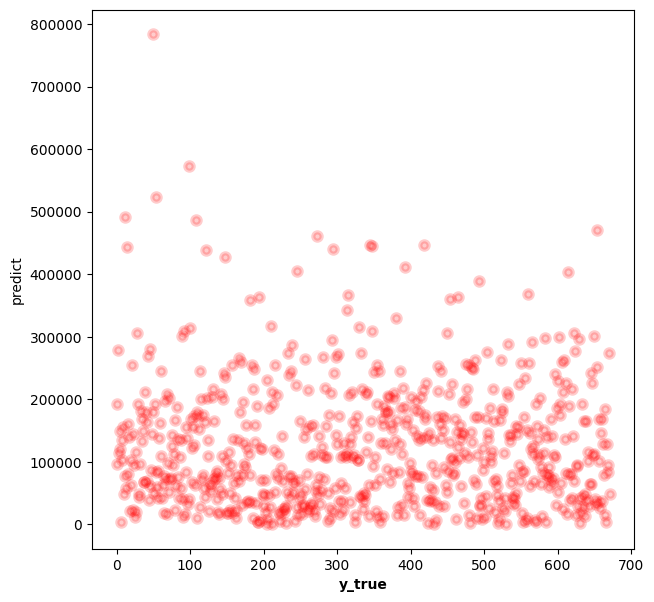

In [578]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [507]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,ageOfTheBuilding
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1,0,19
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,1,1,103
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1,0,58
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1,1,61
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1,1,32
...,...,...,...,...,...,...,...,...,...,...,...
3724,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1,0,45
3725,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1,0,15
3726,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,1,0,15
3727,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1,1,50


попробуем другие модели

In [579]:
from sklearn.neighbors import KNeighborsRegressor

In [580]:
model=KNeighborsRegressor(n_neighbors=5)

In [581]:
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [582]:
mae(Y_test,model.predict(X_test))

143605.14114232978

In [583]:
root_mean_squared_error(Y_test,model.predict(X_test))

183604.75040880346

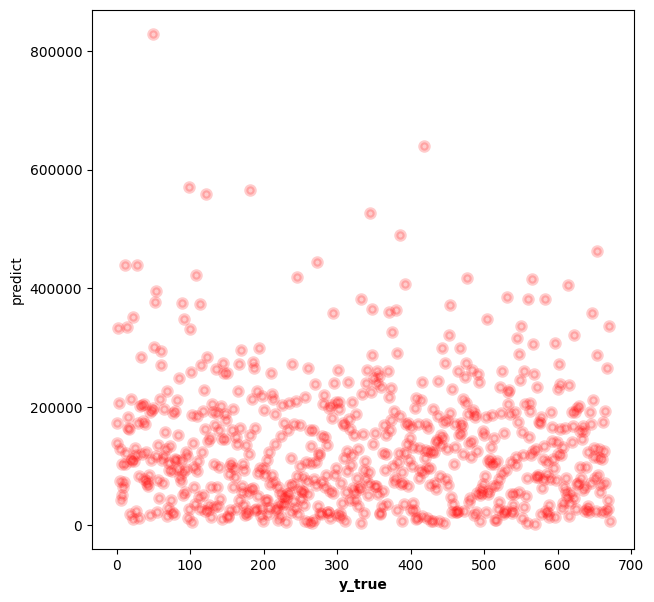

In [585]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [584]:
for n in [7,10,25]:
  model=KNeighborsRegressor(n_neighbors=n)
  model.fit(X_train, Y_train)
  print(mae(Y_test,model.predict(X_test)),root_mean_squared_error(Y_test,model.predict(X_test)))

137558.64821624893 176705.77778644324
135694.90815765312 174868.3291730178
135399.9923651701 172427.8903556959


попробуем svr


In [586]:
from sklearn.svm import SVR

In [587]:
svr = SVR(kernel='linear')
svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [588]:
mae(Y_test,svr.predict(X_test))

129680.45359433921

In [589]:
root_mean_squared_error(Y_test,svr.predict(X_test))

164923.68939960175

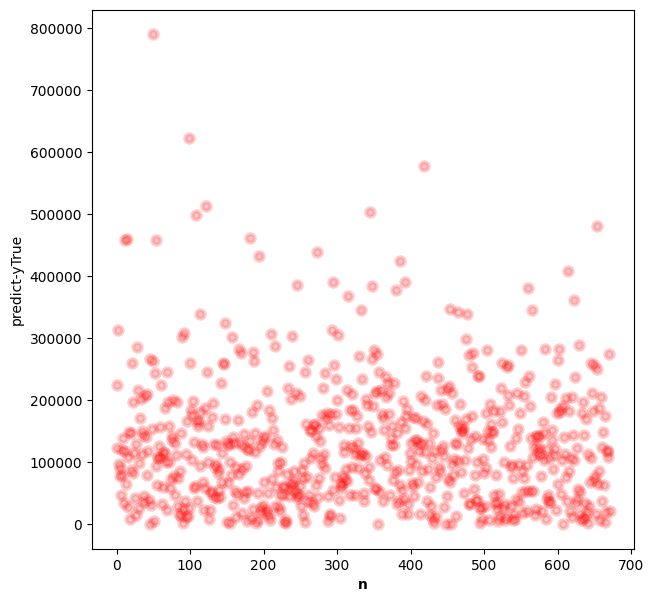

In [591]:
plt.figure(figsize=(7,7))
preds=svr.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-yTrue')
plt.show()

In [592]:
for c in [0.1,.01]:
  for ep in [0.01,.1]:
    svr = SVR(kernel='linear', C=c, epsilon=ep) #linear лучше всех работает, проверила
    svr.fit(X_train, Y_train)
    print(mae(Y_test,svr.predict(X_test)),root_mean_squared_error(Y_test,svr.predict(X_test)))

130631.94872596825 165938.38565071017
130631.94726237426 165938.3914599445
131600.5649201975 167128.44542072702
131600.56818749773 167128.4538785532


попробуем Decision Tree

In [593]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [594]:
mae(Y_test,model.predict(X_test))

163906.29616037052

In [595]:
root_mean_squared_error(Y_test,model.predict(X_test))

217699.31732884725

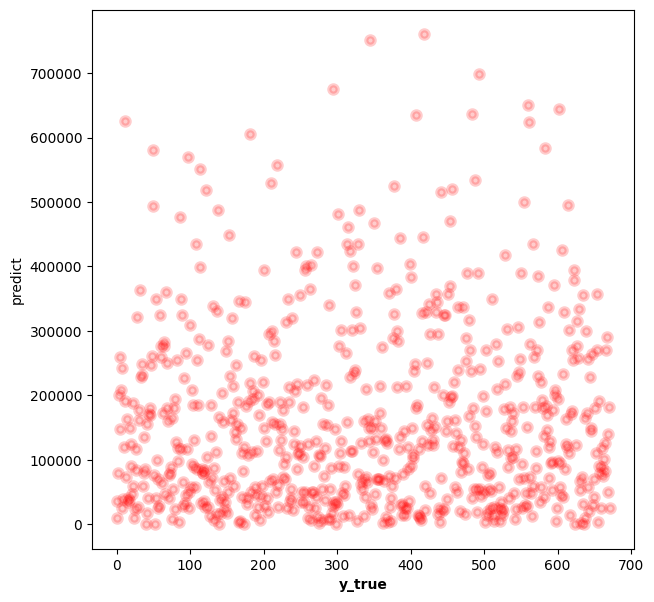

In [596]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

попробуем Random Forest


In [597]:
from sklearn.ensemble import RandomForestRegressor

In [598]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [599]:
mae(Y_test,model.predict(X_test))

125043.06892384088

In [600]:
root_mean_squared_error(Y_test,model.predict(X_test))

160276.87463755067

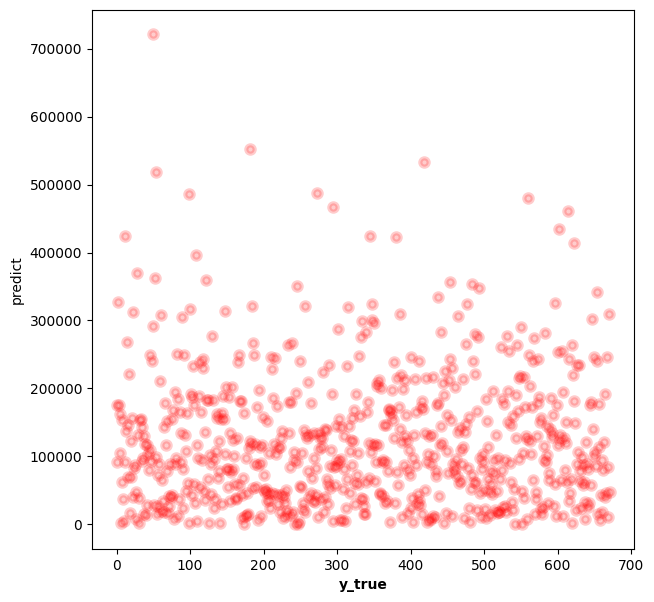

In [601]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [ ]:
#Gradient Boosting

In [602]:
from xgboost import XGBRegressor

In [603]:
model = XGBRegressor()

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [604]:
mae(Y_test,model.predict(X_test))

130583.91630568005

In [605]:
root_mean_squared_error(Y_test,model.predict(X_test))

169176.72290691192

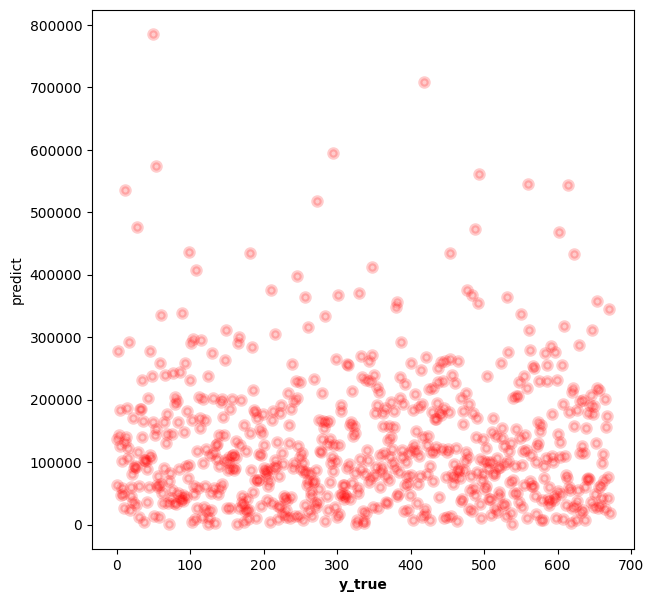

In [606]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

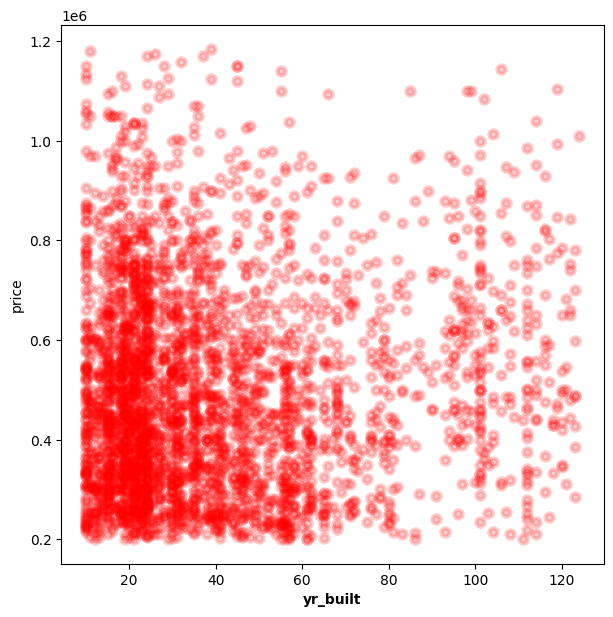

In [367]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['ageOfTheBuilding'], dataset['price'], color='red', linewidth=3, alpha=0.2)
plt.xlabel('yr_built', fontweight='bold')
plt.ylabel('price')
plt.show()

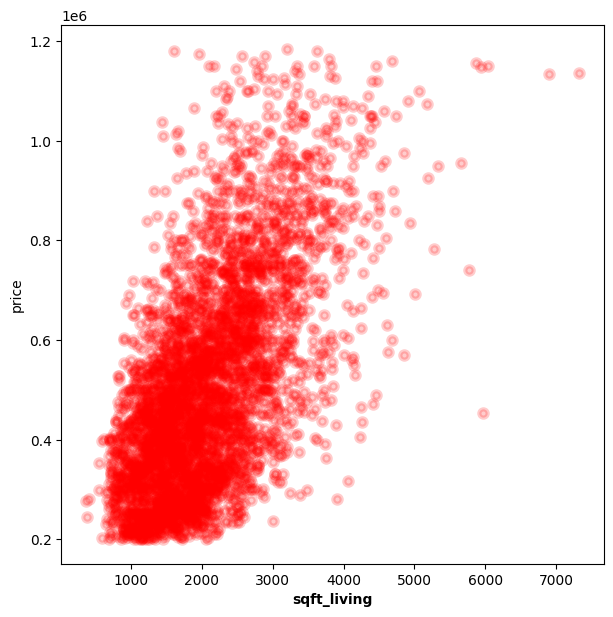

In [368]:
plt.figure(figsize=(7,7))
plt.scatter(dataset3['sqft_living'], dataset3['price'], color='red', linewidth=3, alpha=0.2)
plt.xlabel('sqft_living', fontweight='bold')
plt.ylabel('price')
plt.show()

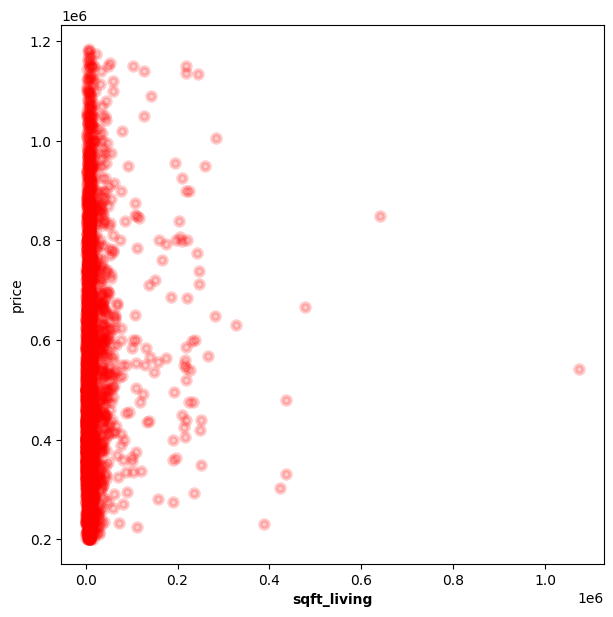

In [370]:
plt.figure(figsize=(7,7))
plt.scatter(dataset3['sqft_lot'], dataset3['price'], color='red', linewidth=3, alpha=0.2)
plt.xlabel('sqft_living', fontweight='bold')
plt.ylabel('price')
plt.show()